In [4]:
import pandas as pd

import requests
import json

demo = '31fa1a9122c9b0d18024b5eb2d9ef148'
#pass sector and marketcap as arguments to limit the results
companies = requests.get(f'https://financialmodelingprep.com/api/v3/stock-screener?marketCapMoreThan=1000000000&sector=Technology&limit=100&apikey={demo}')
companies = companies.json()

technological_companies = []

for item in companies:
    technological_companies.append(item['symbol'])
print(technological_companies)

['AAPL', 'MSF.BR', 'MSFT', 'TSM', 'NVDA', 'ADBE', 'INCO.BR', 'INTC', 'CIS.BR', 'SAP', 'CSCO', 'CRM', 'ORCL', 'SHOP.TO', 'ASML', 'ACN', 'AVGO', 'ASML.AS', 'QCOM', 'TXN', 'SHOP', 'IBMA.BR', 'IBM', 'SNE', 'AMD', 'FIS', 'NOW', 'INTU', 'FISV', 'SQ', 'AMAT', 'VMW', 'ABB', 'LRCX', 'INFY', 'UBER', 'ADSK', 'MU', 'DELL', 'ADI', 'WDAY', 'ADYEN.AS', 'TEAM', 'DSY.PA', 'ERIC', 'DOCU', 'CTSH', 'RHT', 'NXPI', 'APH', 'KLAC', 'CSU.TO', 'TEL', 'MB', 'SPLK', 'CDNS', 'SNPS', 'NOK', 'ANSS', 'STM', 'HPQ', 'XLNX', 'RNG', 'MCHP', 'OKTA', 'PANW', 'DDOG', 'FTV', 'MSI', 'GLW', 'SWKS', 'VRSN', 'GIB-A.TO', 'NOKIA.PA', 'HRS', 'MRVL', 'TSS', 'STM.PA', 'TTD', 'CRWD', 'WIT', 'FTNT', 'KYO', 'GRMN', 'FLT', 'COUP', 'KEYS', 'CAP.PA', 'MXIM', 'CA', 'CAJ', 'GIB', 'AKAM', 'PAYC', 'CHKP', 'EPAM', 'CTXS', 'ANET', 'CDW', 'DVMT']


In [5]:

metrics= {}

for item in technological_companies:
    try:
        balancesheet = requests.get(f'https://financialmodelingprep.com/api/v3/balance-sheet-statement/{item}?apikey={demo}').json()
        incomestatemnt = requests.get(f'https://financialmodelingprep.com/api/v3/income-statement/{item}?&apikey={demo}').json()
        marketcap = requests.get(f'https://financialmodelingprep.com/api/v3/market-capitalization/{item}?apikey={demo}').json()
        marketcap = marketcap[0]['marketCap']
        companydata = requests.get(f'https://financialmodelingprep.com/api/v3/profile/{item}?apikey={demo}').json()
        latest_Annual_Dividend = companydata[0]['lastDiv']
        price = companydata[0]['price']


        balancesheet[0]
        current_ratio = balancesheet[0]['totalCurrentAssets'] / balancesheet[0]['totalCurrentLiabilities']
        debt_to_assets = balancesheet[0]['totalDebt'] / balancesheet[0]['totalAssets']
        debt_to_equity = balancesheet[0]['totalDebt'] / balancesheet[0]['totalStockholdersEquity']
        dividend_yield = latest_Annual_Dividend / price
        interest_coverage = incomestatemnt[0]['operatingIncome'] / incomestatemnt[0]['interestExpense']
        gross_profit_margin = (incomestatemnt[0]['revenue'] - incomestatemnt[0]['costOfRevenue'])/incomestatemnt[0]['revenue']
        #index one in below because we want to have equity at the beginning of the period. *4 if we want to annualize it is quarter revenue
        ROE = (incomestatemnt[0]['netIncome'] / ((balancesheet[0]['totalStockholdersEquity']+ balancesheet[1]['totalStockholdersEquity'])/2))
        price_to_sales = marketcap / (incomestatemnt[0]['revenue'])
        price_to_earnings = marketcap / (incomestatemnt[0]['netIncome']) 
        price_to_book = marketcap / balancesheet[0]['totalStockholdersEquity']
        ROA = (incomestatemnt[0]['netIncome']/balancesheet[0]['totalAssets'])

        metrics[item] = {}
        metrics[item]['ROA'] = ROA

        metrics[item]['ROE'] = ROE
        metrics[item]['Current Ratio'] = current_ratio
        metrics[item]['Debt to Assets'] = debt_to_assets
        metrics[item]['Debt to Equity'] = debt_to_equity
        metrics[item]['Dividend Yield'] = (dividend_yield*100)
        metrics[item]['Interest Coverage'] = interest_coverage
        metrics[item]['Gross Profit Margin'] = gross_profit_margin
        metrics[item]['Price to Sales'] = price_to_sales
        metrics[item]['Price to Earnings'] = price_to_earnings
        metrics[item]['Price to Book'] = price_to_book
    except:
        pass

print(metrics)

{'AAPL': {'ROA': 0.16323009842961633, 'ROE': 0.5591722113998027, 'Current Ratio': 1.540125617208044, 'Debt to Assets': 0.3191784140188352, 'Debt to Equity': 1.1940478295464592, 'Dividend Yield': 0.694459609967024, 'Interest Coverage': 17.87751677852349, 'Gross Profit Margin': 0.3781776810903472, 'Price to Sales': 7.700141869337797, 'Price to Earnings': 36.25627462561698, 'Price to Book': 22.139694884549243}, 'MSFT': {'ROA': 0.14696111326835065, 'ROE': 0.40139779000516695, 'Current Ratio': 2.5157654542940118, 'Debt to Assets': 0.24168716044220093, 'Debt to Equity': 0.615558222883419, 'Dividend Yield': 0.9550319143830686, 'Interest Coverage': 20.38826707834813, 'Gross Profit Margin': 0.6778100199279796, 'Price to Sales': 11.167926979974128, 'Price to Earnings': 36.0692187855062, 'Price to Book': 13.500651516778808}, 'NVDA': {'ROA': 0.16147848686110308, 'ROE': 0.25953773322194373, 'Current Ratio': 7.673766816143497, 'Debt to Assets': 0.11498700548657234, 'Debt to Equity': 0.16314323172730

In [6]:
metrics

{'AAPL': {'ROA': 0.16323009842961633,
  'ROE': 0.5591722113998027,
  'Current Ratio': 1.540125617208044,
  'Debt to Assets': 0.3191784140188352,
  'Debt to Equity': 1.1940478295464592,
  'Dividend Yield': 0.694459609967024,
  'Interest Coverage': 17.87751677852349,
  'Gross Profit Margin': 0.3781776810903472,
  'Price to Sales': 7.700141869337797,
  'Price to Earnings': 36.25627462561698,
  'Price to Book': 22.139694884549243},
 'MSFT': {'ROA': 0.14696111326835065,
  'ROE': 0.40139779000516695,
  'Current Ratio': 2.5157654542940118,
  'Debt to Assets': 0.24168716044220093,
  'Debt to Equity': 0.615558222883419,
  'Dividend Yield': 0.9550319143830686,
  'Interest Coverage': 20.38826707834813,
  'Gross Profit Margin': 0.6778100199279796,
  'Price to Sales': 11.167926979974128,
  'Price to Earnings': 36.0692187855062,
  'Price to Book': 13.500651516778808},
 'NVDA': {'ROA': 0.16147848686110308,
  'ROE': 0.25953773322194373,
  'Current Ratio': 7.673766816143497,
  'Debt to Assets': 0.11498

In [7]:
metrics_df = pd.DataFrame.from_dict(metrics, orient='index')
metrics_df = metrics_df.T
metrics_df['mean'] = metrics_df.mean(axis=1)

In [8]:
metrics_df

,AAPL,MSFT,NVDA,ADBE,INTC,CSCO,ORCL,ACN,AVGO,QCOM,...,MRVL,TSS,COUP,KEYS,MXIM,CA,AKAM,PAYC,CTXS,mean
ROA,0.163230,0.146961,0.161478,0.142154,0.154171,0.118833,0.087796,0.160427,0.040360,0.133083,...,0.142312,0.077210,-0.056981,0.093764,0.221018,0.036447,0.068224,0.072610,0.155348,0.092215
ROE,0.559172,0.401398,0.259538,0.296744,0.275784,0.302729,0.598659,0.385820,0.105585,1.534640,...,0.198235,0.238934,-0.239366,0.228435,0.438262,0.082182,0.139576,0.419271,0.981609,0.202820
Current Ratio,1.540126,2.515765,7.673767,0.792940,1.400224,1.505897,3.031395,1.396741,1.437455,1.876329,...,2.164983,2.212531,1.819478,3.205384,6.841934,1.327311,3.218660,1.067052,0.827268,1.983156
Debt to Assets,0.319178,0.241687,0.114987,0.199305,0.212424,0.252227,0.620073,0.000761,0.486376,0.484298,...,0.129255,0.517385,0.021134,0.269968,0.265115,0.213093,0.262569,0.013122,0.169273,0.250599
Debt to Equity,1.194048,0.615558,0.163143,0.392972,0.373440,0.734741,5.928441,0.001572,1.316186,3.251375,...,0.165813,1.494332,0.075594,0.595206,0.537905,0.472095,0.502956,0.061966,0.886911,-0.119381
Dividend Yield,0.694460,0.955032,0.137602,0.000000,2.672811,3.333333,1.772853,1.386842,3.780891,2.219079,...,0.696460,0.416433,0.000000,0.000000,2.761795,2.294713,0.000000,0.000000,1.014787,1.022728
Interest Coverage,17.877517,20.388267,54.730769,20.787722,45.061350,16.552969,6.965414,274.575360,2.385042,12.012759,...,10.257395,5.035116,-1.949785,8.887500,17.157706,8.811024,11.119804,240.663830,11.661330,26.763087
Gross Profit Margin,0.378178,0.677810,0.619894,0.850266,0.585562,0.629354,0.796816,0.308103,0.555826,0.560670,...,0.502727,0.381243,0.642779,0.588891,0.648355,0.929634,0.658689,0.851225,0.850245,0.620187
Price to Sales,7.700142,11.167927,26.076373,19.537543,2.890725,3.492235,4.376300,3.461915,6.079043,6.599601,...,8.530459,0.005929,48.671079,4.580804,8.192084,4.365299,6.219762,23.832557,5.738456,10.611483
Price to Earnings,36.256275,36.069219,101.824693,73.949788,9.883649,15.597708,16.869591,31.304292,50.428835,29.451435,...,14.532449,0.041414,-208.825572,31.741062,22.911781,38.838319,37.649145,97.358375,25.338309,18.035713


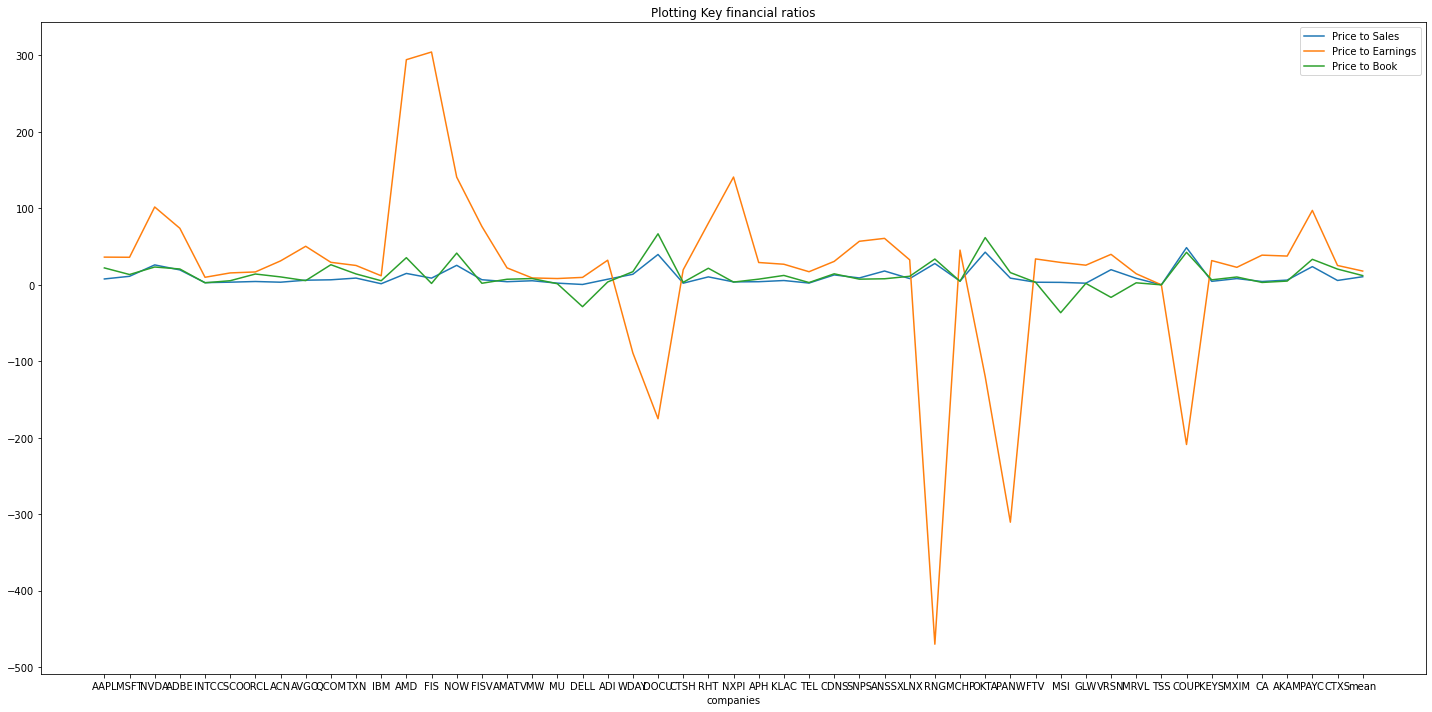

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
x1 = metrics_df.columns
#in the 8 row we have Price To Sales data
y1 = metrics_df.iloc[8,]
plt.plot(x1, y1, label = "Price to Sales")

# line 2 points
x2 = metrics_df.columns
#in the 9 row we have Price To Earnings data:
y2 = metrics_df.iloc[9,]
# plotting the line 2 points 
plt.plot(x2, y2, label = "Price to Earnings")

# line 3 points
x3 = metrics_df.columns
#in the 10 row we have Price To Book data:
y3 = metrics_df.iloc[10,]
# plotting the line 2 points 
plt.plot(x3, y3, label = "Price to Book")

plt.xlabel('companies')
# Set the y axis label of the current axis.
plt.ylabel('')
# Set a title of the current axes.
plt.title('Plotting Key financial ratios')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.tight_layout()
plt.show()

In [10]:
metrics_filter = metrics_df.T
metrics_filter[(metrics_filter['ROE'] > 0.2) & (metrics_filter['Current Ratio']> 1.09)]
mf1 = metrics_filter[(metrics_filter['ROE'] > 0.2) & (metrics_filter['Current Ratio']> 1.09)]

In [12]:
mf1

,ROA,ROE,Current Ratio,Debt to Assets,Debt to Equity,Dividend Yield,Interest Coverage,Gross Profit Margin,Price to Sales,Price to Earnings,Price to Book
AAPL,0.163230,0.559172,1.540126,0.319178,1.194048,0.694460,17.877517,0.378178,7.700142,36.256275,22.139695
MSFT,0.146961,0.401398,2.515765,0.241687,0.615558,0.955032,20.388267,0.677810,11.167927,36.069219,13.500652
NVDA,0.161478,0.259538,7.673767,0.114987,0.163143,0.137602,54.730769,0.619894,26.076373,101.824693,23.328568
INTC,0.154171,0.275784,1.400224,0.212424,0.373440,2.672811,45.061350,0.585562,2.890725,9.883649,2.678776
CSCO,0.118833,0.302729,1.505897,0.252227,0.734741,3.333333,16.552969,0.629354,3.492235,15.597708,5.399332
ORCL,0.087796,0.598659,3.031395,0.620073,5.928441,1.772853,6.965414,0.796816,4.376300,16.869591,14.160452
ACN,0.160427,0.385820,1.396741,0.000761,0.001572,1.386842,274.575360,0.308103,3.461915,31.304292,10.382860
QCOM,0.133083,1.534640,1.876329,0.484298,3.251375,2.219079,12.012759,0.560670,6.599601,29.451435,26.313708
TXN,0.278444,0.560527,4.126707,0.322067,0.651510,2.609263,33.664706,0.637141,8.839466,25.341448,14.273947
AMAT,0.142241,0.359386,2.295030,0.279279,0.646822,1.230992,14.135021,0.437158,4.111419,22.194978,7.311859


In [17]:

mf1['ROE']
mf1_roe = mf1['ROE']
mf1_roe

AAPL    0.559172
MSFT    0.401398
NVDA    0.259538
INTC    0.275784
CSCO    0.302729
ORCL    0.598659
ACN     0.385820
QCOM    1.534640
TXN     0.560527
AMAT    0.359386
RHT     0.281430
APH     0.270261
KLAC    0.457049
CDNS    0.583246
XLNX    0.306273
TSS     0.238934
KEYS    0.228435
MXIM    0.438262
mean    0.202820
Name: ROE, dtype: float64

In [22]:
mf1.sort_values(by='Price to Sales', ascending=False)

,ROA,ROE,Current Ratio,Debt to Assets,Debt to Equity,Dividend Yield,Interest Coverage,Gross Profit Margin,Price to Sales,Price to Earnings,Price to Book
NVDA,0.161478,0.259538,7.673767,0.114987,0.163143,0.137602,54.730769,0.619894,26.076373,101.824693,23.328568
CDNS,0.294582,0.583246,1.739082,0.103067,0.164544,0.000000,26.119072,0.885993,12.979749,30.662768,14.420524
MSFT,0.146961,0.401398,2.515765,0.241687,0.615558,0.955032,20.388267,0.677810,11.167927,36.069219,13.500652
mean,0.092215,0.202820,1.983156,0.250599,-0.119381,1.022728,26.763087,0.620187,10.611483,18.035713,12.121718
RHT,0.077660,0.281430,1.272199,0.053923,0.186712,0.000000,25.820748,0.851802,10.419038,80.715419,21.704460
TXN,0.278444,0.560527,4.126707,0.322067,0.651510,2.609263,33.664706,0.637141,8.839466,25.341448,14.273947
MXIM,0.221018,0.438262,6.841934,0.265115,0.537905,2.761795,17.157706,0.648355,8.192084,22.911781,10.274440
XLNX,0.168904,0.306273,2.679554,0.265562,0.538377,1.762532,19.886690,0.668751,8.190807,32.678315,11.189736
AAPL,0.163230,0.559172,1.540126,0.319178,1.194048,0.694460,17.877517,0.378178,7.700142,36.256275,22.139695
QCOM,0.133083,1.534640,1.876329,0.484298,3.251375,2.219079,12.012759,0.560670,6.599601,29.451435,26.313708
